In [1]:
from src.create_synthetic import CreateSynthetic
from src.helper_functions import run_synthetic_high_res
import numpy as np
import matplotlib.pyplot as plt
import icepack.plot
import firedrake
import geopandas as gpd
import rasterio
from rasterio.plot import show

GeoJSON with 4 bounding box lines written to boundary_49600.geojson


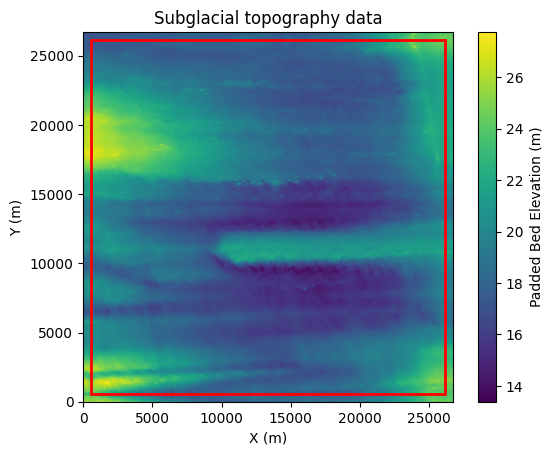

Using default filename: boundary_49600.geojson
Reading local outline
Using starting thickness: 5000 m
Using surface slope: -300


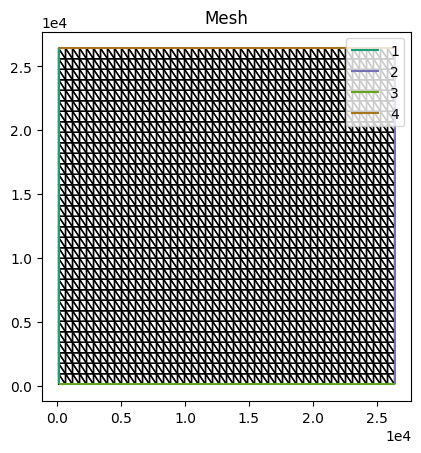

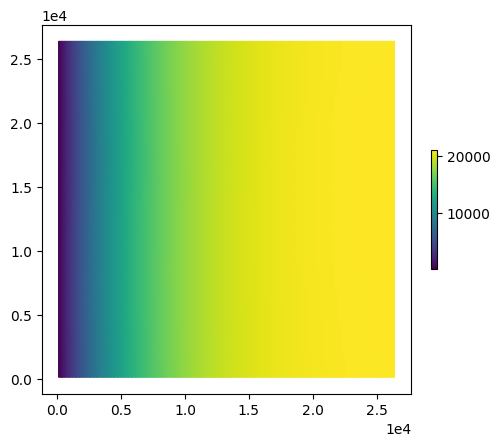

In [2]:
u0, create_synthetic = run_synthetic_high_res(model_filename = None, 
                           index = None, 
                           scaling_multiplier = 50, 
                           pad_x_minus= 10, 
                           pad_x_plus = 10, 
                           pad_y = 10, 
                           pixel_size_x = 50, 
                           pixel_size_y = 50, 
                           filename = None, 
                           uniform_thickness=5000, 
                           surface_slope=-300, 
                           u_in = 200, 
                           u_out = None, 
                           constant_temperature = 260, 
                           constant_C=0.01, 
                           drichlet_ids = [1], 
                           side_wall_ids = [3, 4],
                           plot_topography = True,
                           plot_mesh = True,
                           plot_depth_average_vel= True)

In [3]:
total_form_drag, shear_stress = create_synthetic.compute_form_drag_volume(u0, create_synthetic.h0, create_synthetic.s0, create_synthetic.b)

In [4]:
print("Total form drag is ", total_form_drag)
print("Average shear stress is ", shear_stress)

Total form drag is  2721.86425501836
Average shear stress is  4.155587730958665e-06


In [5]:
rms_roughness, slope_roughness = create_synthetic.compute_roughness_metrics(create_synthetic.b)    

In [6]:
print("RMS roughness is ", rms_roughness)
print("Slope roughness is ", slope_roughness)

RMS roughness is  2.360599938476594
Slope roughness is  0.0023693656363592023


In [7]:
mean_velocity = create_synthetic.compute_mean_velocity(u0, create_synthetic.h0)

In [8]:
print("Mean velocity is ", mean_velocity)

Mean velocity is  [17019.280863814125, 4.809619759760754]
